<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
# import piplite
# await piplite.install(['numpy'],['pandas'])
# await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
import requests
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
response = requests.get(URL)
boston_url = io.BytesIO(response.content)

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


For the "Median value of owner-occupied homes" provide a boxplot

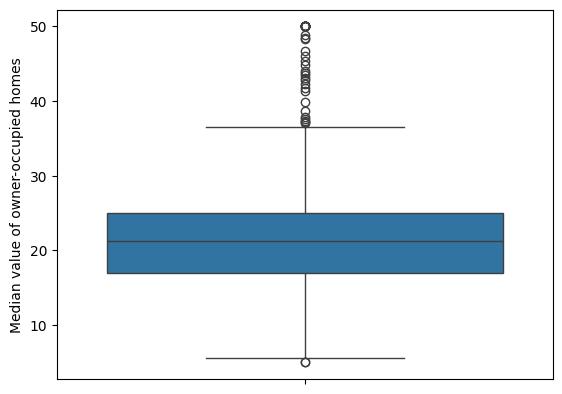

In [6]:
sns.boxplot(boston_df["MEDV"])
plt.ylabel('Median value of owner-occupied homes')
plt.show()

Provide a  bar plot for the Charles river variable

In [7]:
value_counts = boston_df['CHAS'].value_counts()

value_counts

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

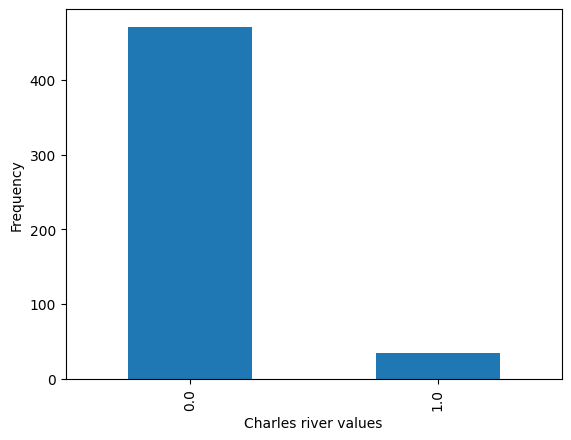

In [8]:
value_counts.plot(kind='bar')

plt.xlabel('Charles river values')
plt.ylabel('Frequency')
plt.show()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [9]:
boston_df['Age_bins'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 150], labels=['0-35', '35-70', '70+'])

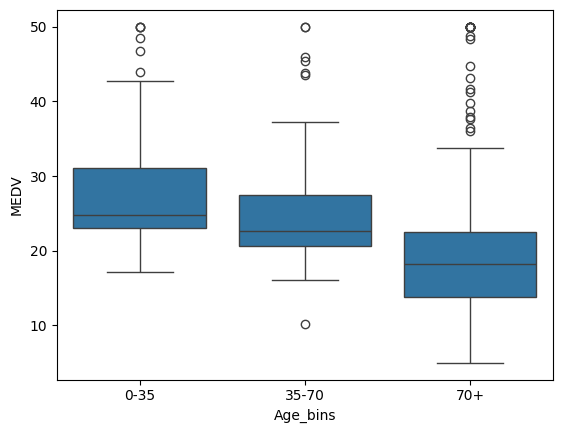

In [10]:
sns.boxplot(x='Age_bins', y='MEDV', data=boston_df)
plt.show()

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

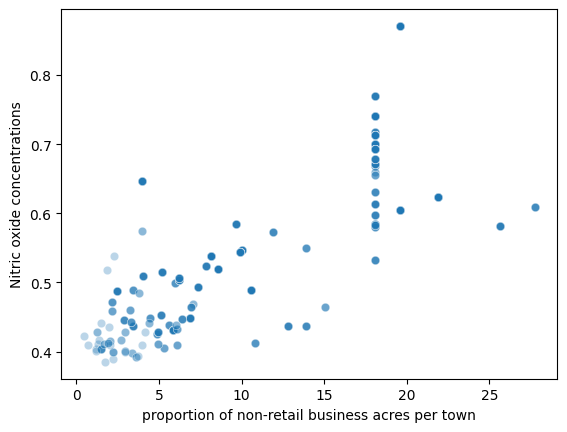

In [11]:
sns.scatterplot(data=boston_df, x='INDUS', y='NOX', alpha = 0.3)
plt.xlabel('proportion of non-retail business acres per town')
plt.ylabel('Nitric oxide concentrations')
plt.show()

Looks like there is a positive correlation between the variables.

Create a histogram for the pupil to teacher ratio variable

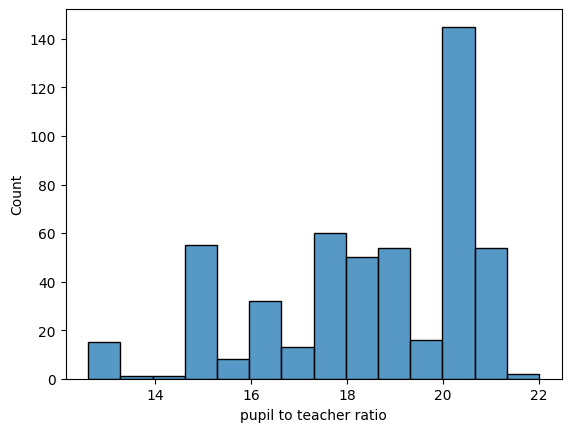

In [12]:
sns.histplot(data=boston_df, x='PTRATIO')
plt.xlabel('pupil to teacher ratio')
plt.show()

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null hypothesis: both groups have the same mean value.

In [13]:
grouped = boston_df.groupby('CHAS')

In [14]:
group1 = grouped.get_group(0)['MEDV']
group2 = grouped.get_group(1)['MEDV']

In [15]:
group1

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 471, dtype: float64

In [16]:
group2

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: MEDV, dtype: float64

In [17]:
stat, p_value = scipy.stats.ttest_ind(group1, group2)
print(f"T-statistic: {stat}")
print(f"P-value: {p_value}")

T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05


Since p-value is smaller than $\alpha=0.05$ we reject null hypothesis and coclude that broups have different mean values.

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Perform one way ANOVA with null hypothesis that thre populations have the same mean.

In [18]:
stat, p_value = scipy.stats.f_oneway(boston_df[boston_df['Age_bins']=='0-35']['MEDV'], boston_df[boston_df['Age_bins']=='35-70']['MEDV'], boston_df[boston_df['Age_bins']=='70+']['MEDV'])
print(f"F-statistic: {stat}")
print(f"P-value: {p_value}")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


Since p-value is smaller than $\alpha=0.05$ we reject null hypothesis and conclude that groups have different mean values.

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Perform test with the null hypothesis that the distributions underlying the samples are uncorrelated and normally distributed.

In [19]:
stat, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print(f"Correlation: {stat}")
print(f"P-value: {p_value}")

Correlation: 0.763651446920915
P-value: 7.913361061241532e-98


Since p-value is smaller than $\alpha=0.05$ we reject null hypothesis and conclude that variables are correlated.

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [20]:
formula = 'MEDV ~ DIS'
model = ols(formula=formula, data=boston_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        18:24:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

P value of F test is smaller than $\alpha=0.05$ hence shows that model is statistically significant, t test p value is smaller than $\alpha=0.05$ hence shows that weighted distance  to the five Boston employment centres has an impat on median value of owner occupied homes